# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random


In [2]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


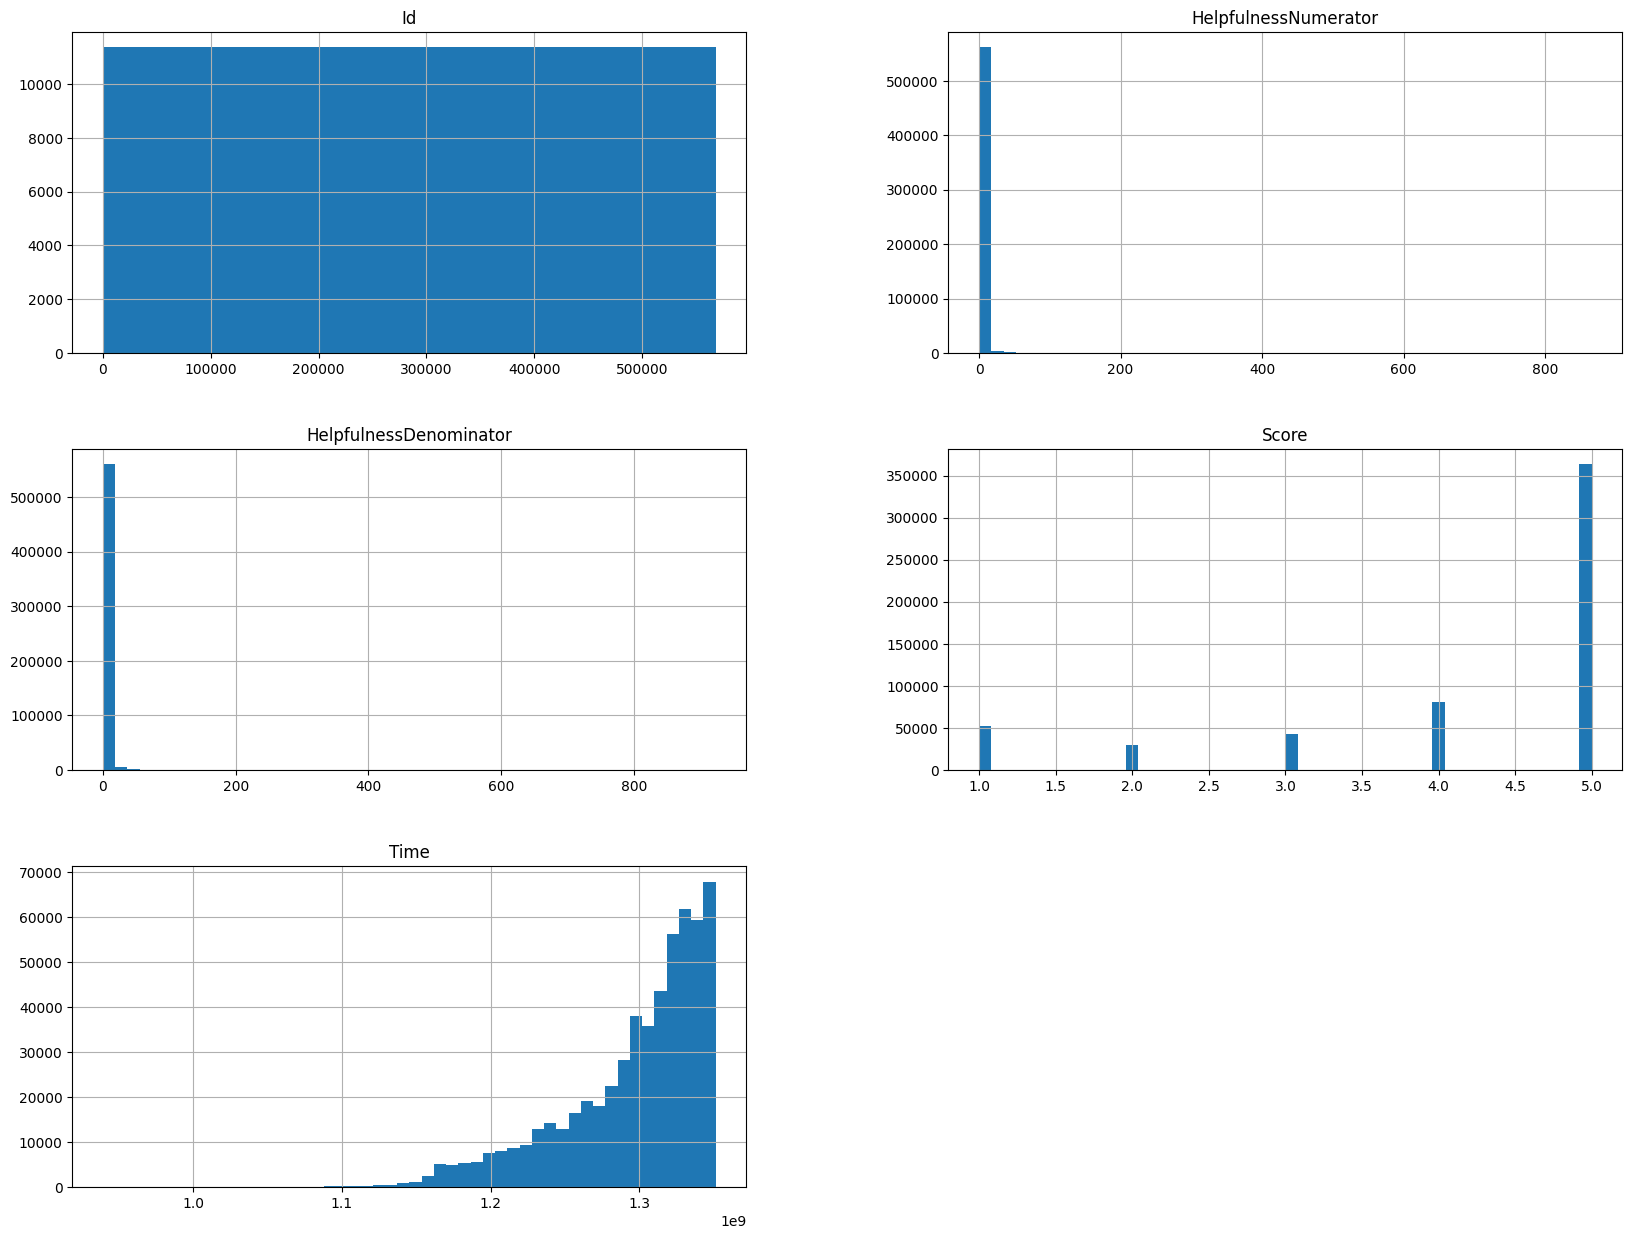

In [8]:
 import matplotlib.pyplot as plt
 df.hist(bins=50, figsize=(20,15))
 plt.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))
stopwords_en = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -3] Temporary failure in name resolution>


In [15]:
csv_grouped = df.groupby(by="ProductId").count().sort_values(by="Summary")
csv_grouped

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
B009WVB40S,1,1,1,1,1,1,1,1,1
B0042RKTG2,1,1,1,1,1,1,1,1,1
B001326V4S,1,1,1,1,1,1,1,1,1
B0042RMG3Q,1,1,1,1,1,1,1,1,1
B0012ZTVKM,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
B002QWHJOU,632,632,632,632,632,632,632,632,632
B0026RQTGE,632,632,632,632,632,632,632,632,632
B002QWP8H0,632,632,632,632,632,632,632,632,632


In [54]:
reviews = df["Text"].head(10000).tolist()
summaries = df["Summary"].head(10000).tolist()

In [36]:
lengths = dict()
for review in reviews:
  length = len(review.split(" "))
  if length in lengths:
    lengths[length] += 1
  else:
    lengths[length] = 1

#Sort in increasing number of keys
sorted_lengths = dict(sorted(lengths.items()))

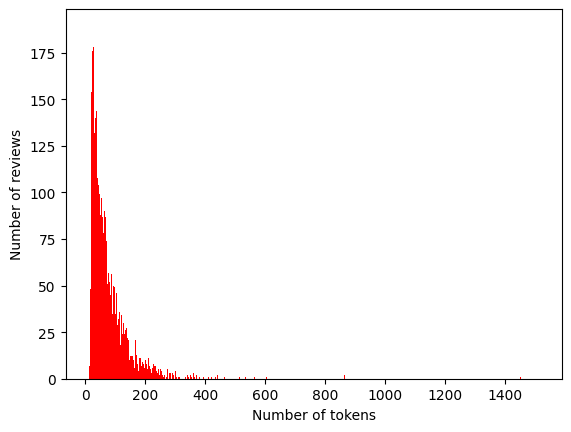

In [23]:

plt.xlabel ('Number of tokens')
plt.ylabel ('Number of reviews')
plt.bar(sorted_lengths.keys(), sorted_lengths.values(), color='r')
plt.show()

In [55]:
total = 0

for review in reviews:
  total += len(review.split(" "))

avg = total / len(reviews)

print("Avg length: {}".format(avg) )

total = 0

for summary in summaries:
  total += len(summary.split(" "))

avg = total / len(summaries)

print("Avg length: {}".format(avg) )

Avg length: 77.9028
Avg length: 4.0777


In [33]:
csv_grouped_stars = df.groupby(by="Score").count().sort_values(by="Summary")
csv_grouped_stars

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
Score,,,,,,,,,
2,29769,29769,29769,29768,29769,29769,29769,29744,29769
3,42640,42640,42640,42640,42640,42640,42640,42638,42640
1,52268,52268,52268,52264,52268,52268,52268,52268,52268
4,80655,80655,80655,80654,80655,80655,80655,80655,80655
5,363122,363122,363122,363102,363122,363122,363122,363122,363122


In [48]:
def preprocess_for_t5(text, max_length=512):
    """
    Preprocesses text for T5 summarization.
    - Normalizes text
    - Removes HTML tags, URLs, and special characters
    - Splits long text into chunks
    - Adds the "summarize:" prefix
    """
    import re
    
    # Remove extra spaces and lowercase 
    text = ' '.join(text.strip().split())
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    
    # Remove special characters 
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'\"]', ' ', text)
    
    # Add task-specific prefix
    text = f"summarize: {text}"
    
    return text

In [49]:
df['preprocessed_text'] = df['Text'].apply(preprocess_for_t5)

In [61]:
df = pd.DataFrame(df)
df.to_csv("/kaggle/working/output.csv", index=False)

In [ ]:
import pandas as pd
categories = pd.read_csv('./categories.csv')
categories


,Id,Category
0,1,Pet Food
1,2,Snacks
2,3,Confectionery
3,4,Beverages
4,5,Pet Food
...,...,...
236,237,Pet Food
237,238,Pet Food
238,239,Beverages
239,240,Confectionery


In [3]:
df = pd.read_csv('./output.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,summarize: i have bought several of the vitali...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,summarize: product arrived labeled as jumbo sa...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,summarize: this is a confection that has been ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,summarize: if you are looking for the secret i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,summarize: great taffy at a great price. there...
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,summarize: we switched from the advance simila...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...","summarize: like the bad reviews say, the organ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,summarize: i wanted to solely breastfeed but w...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,summarize: i love the fact that i can get this...


In [4]:
result = pd.concat([df, categories], axis=1)

In [5]:
result

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_text,Id,Category
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,summarize: i have bought several of the vitali...,1.0,Pet Food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,summarize: product arrived labeled as jumbo sa...,2.0,Snacks
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,summarize: this is a confection that has been ...,3.0,Confectionery
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,summarize: if you are looking for the secret i...,4.0,Beverages
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,summarize: great taffy at a great price. there...,5.0,Pet Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,summarize: we switched from the advance simila...,NaN,NaN
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...","summarize: like the bad reviews say, the organ...",NaN,NaN
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,summarize: i wanted to solely breastfeed but w...,NaN,NaN
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,summarize: i love the fact that i can get this...,NaN,NaN


In [6]:
result["Category"].fillna('product review', inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_4104\1422743849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  result["Category"].fillna('product review', inplace=True)


In [7]:
result

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_text,Id,Category
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,summarize: i have bought several of the vitali...,1.0,Pet Food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,summarize: product arrived labeled as jumbo sa...,2.0,Snacks
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,summarize: this is a confection that has been ...,3.0,Confectionery
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,summarize: if you are looking for the secret i...,4.0,Beverages
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,summarize: great taffy at a great price. there...,5.0,Pet Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,summarize: we switched from the advance simila...,NaN,product review
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...","summarize: like the bad reviews say, the organ...",NaN,product review
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,summarize: i wanted to solely breastfeed but w...,NaN,product review
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,summarize: i love the fact that i can get this...,NaN,product review


In [8]:
result.to_csv("./final_data.csv", index=False)